In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Extraction

In [3]:
df = pd.read_csv('Premier_League.csv')

In [4]:
df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [5]:
df.shape

(380, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   Home Team         380 non-null    object 
 5   Goals Home        380 non-null    int64  
 6   Away Team         380 non-null    object 
 7   Away Goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

In [ ]:
# Summary statistics for numerical columns
df.describe()

,Goals Home,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,50.447632,49.552368,13.973684,11.313158,4.913158,3.897368,5.110526,4.236842,...,50.611053,49.391579,2.650000,3.213158,10.607895,10.957895,1.676316,1.939474,0.052632,0.026316
std,1.419944,1.183518,12.896888,12.896888,5.600541,4.908593,2.495449,2.230159,2.547365,2.397604,...,11.012290,11.010639,1.838069,1.967905,3.273213,3.481321,1.259462,1.364464,0.246063,0.160284
min,0.000000,0.000000,18.300000,18.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,39.900000,40.400000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,...,43.450000,42.475000,1.000000,2.000000,8.000000,8.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,51.000000,49.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,...,51.450000,48.550000,2.000000,3.000000,10.000000,11.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,59.600000,60.100000,17.000000,15.000000,7.000000,5.000000,7.000000,6.000000,...,57.525000,56.550000,4.000000,5.000000,13.000000,13.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,81.100000,81.700000,33.000000,30.000000,15.000000,11.000000,15.000000,12.000000,...,90.000000,90.000000,9.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,1.000000


# Exploratory Data Analysis

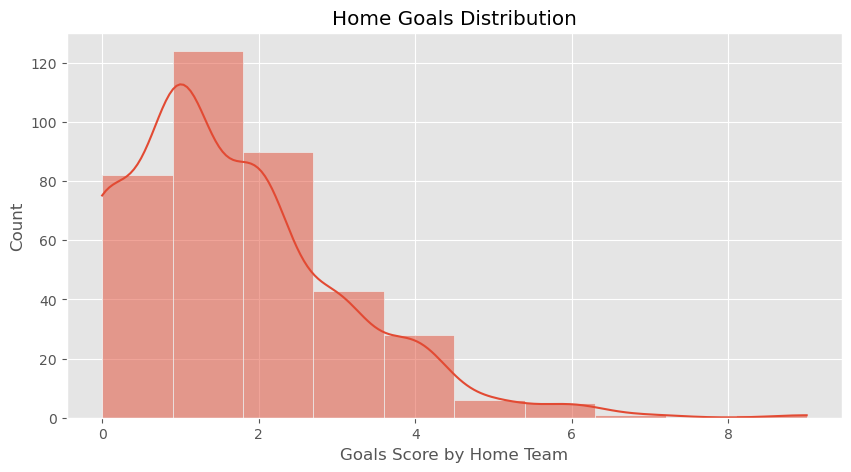

In [14]:
# Home Goal Distribution
plt.figure(figsize = (10, 5))
sns.histplot(df['Goals Home'], bins = 10, kde = True)
plt.title('Home Goals Distribution')
plt.xlabel('Goals Score by Home Team')
plt.ylabel('Count')
plt.grid(True)
plt.show()

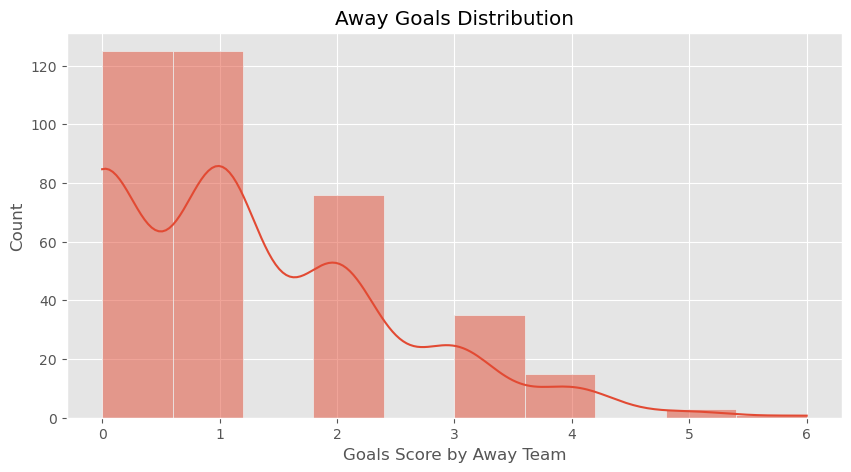

In [ ]:
# Away Goals Distribution
plt.figure(figsize = (10, 5))
sns.histplot(df['Away Goals'], bins = 10, kde = True)
plt.title('Away Goals Distribution')
plt.xlabel('Goals Score by Away Team')
plt.ylabel('Count')
plt.grid(True)
plt.show()

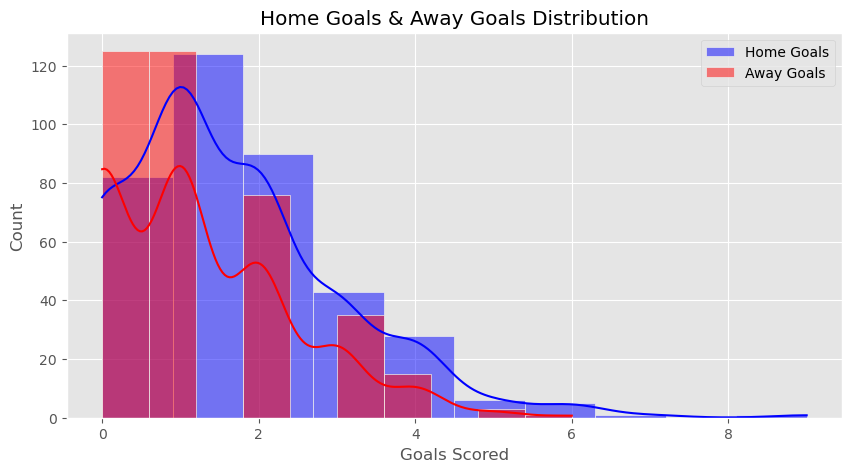

In [23]:
# Distribution of Home and Away Goals
plt.figure(figsize = (10, 5))
sns.histplot(df['Goals Home'], bins = 10, kde = True, color = 'blue', label = 'Home Goals')
sns.histplot(df['Away Goals'], bins = 10, kde = True, color = 'red', label = 'Away Goals')
plt.title('Home Goals & Away Goals Distribution')
plt.xlabel('Goals Scored')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

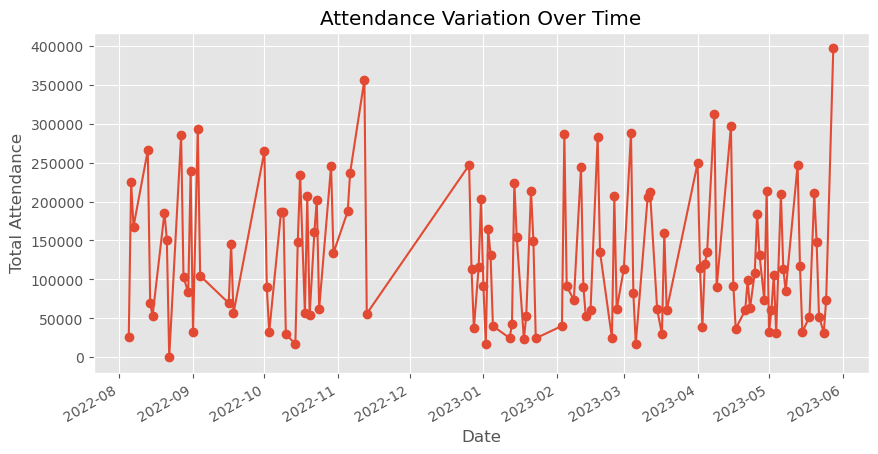

In [32]:
# Attendance Variation over time
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['attendance'] = df['attendance'].astype(str).str.replace(',', '').str.replace('Nan', '0').astype(int) # Take out the , from the attendance and convert to integer
attendance_overtime = df.groupby('date')['attendance'].sum()

plt.figure(figsize = (10, 5))
attendance_overtime.plot(kind = 'line', marker = 'o')
plt.title('Attendance Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Total Attendance')
plt.grid(True)
plt.show()

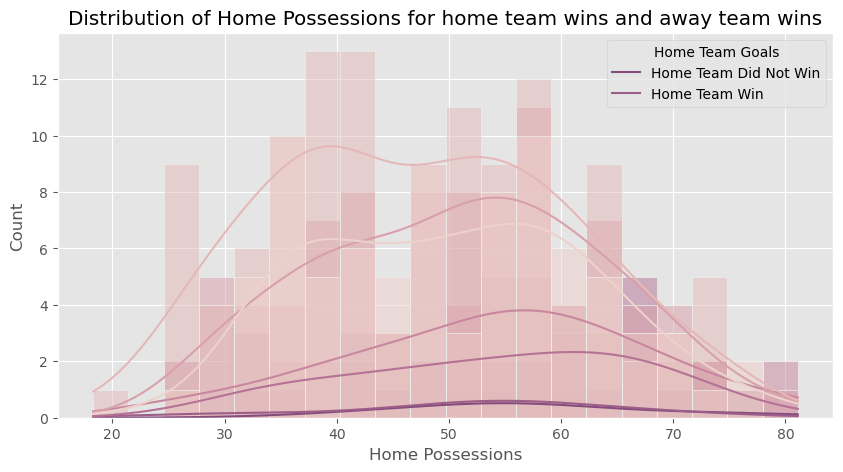

In [35]:
# Selecting relevant columns for analysis
column_of_interest = ['Home Team', 'Goals Home', 'Away Team', 'Away Goals', 'home_possessions', 'away_possessions', 'home_shots', 'away_shots']

data_subset = df[column_of_interest]

# Visualize the distribution of 'home_possessions' for home team wins and away team wins
plt.figure(figsize = (10, 5))
sns.histplot(data = data_subset, x = 'home_possessions', hue = 'Goals Home', bins = 20, kde = True)
plt.title("Distribution of Home Possessions for home team wins and away team wins")
plt.xlabel('Home Possessions')
plt.legend(title = 'Home Team Goals', labels = ['Home Team Did Not Win', 'Home Team Win'])
plt.show()

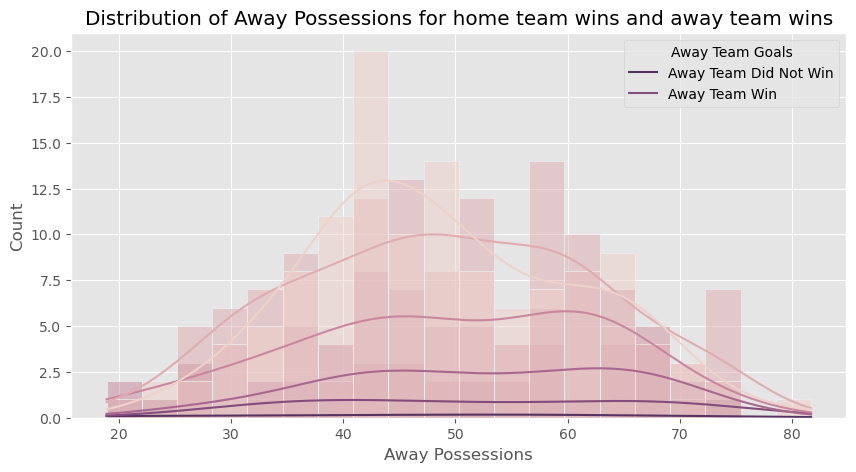

In [41]:
# Visualize the distribution of 'away_possessions' for home team wins and away team wins
plt.figure(figsize = (10, 5))
sns.histplot(data = data_subset, x = 'away_possessions', hue = 'Away Goals', bins = 20, kde = True)
plt.title("Distribution of Away Possessions for home team wins and away team wins")
plt.xlabel('Away Possessions')
plt.legend(title = 'Away Team Goals', labels = ['Away Team Did Not Win', 'Away Team Win'])
plt.show()

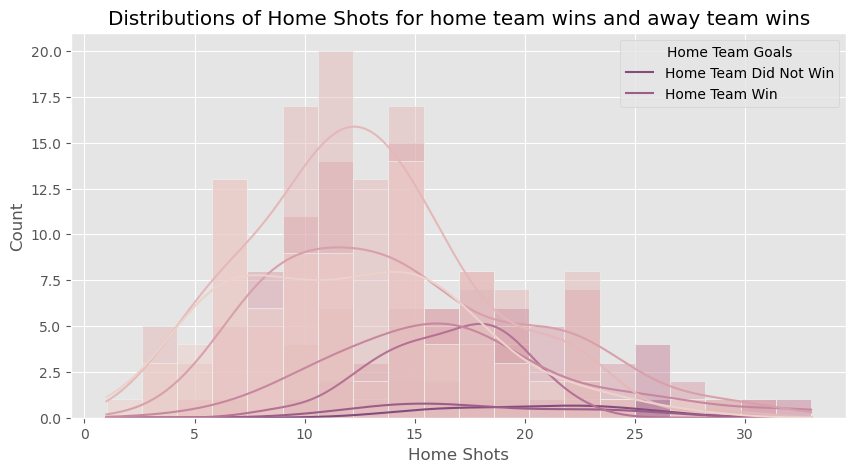

In [42]:
# Visualize the distributions of 'home_shots' for home team wins and away team wins
plt.figure(figsize = (10, 5))
sns.histplot(data = data_subset, x = 'home_shots', hue = 'Goals Home', bins = 20, kde = True)
plt.title('Distributions of Home Shots for home team wins and away team wins')
plt.xlabel('Home Shots')
plt.legend(title = 'Home Team Goals', labels = ['Home Team Did Not Win', 'Home Team Win'])
plt.show()

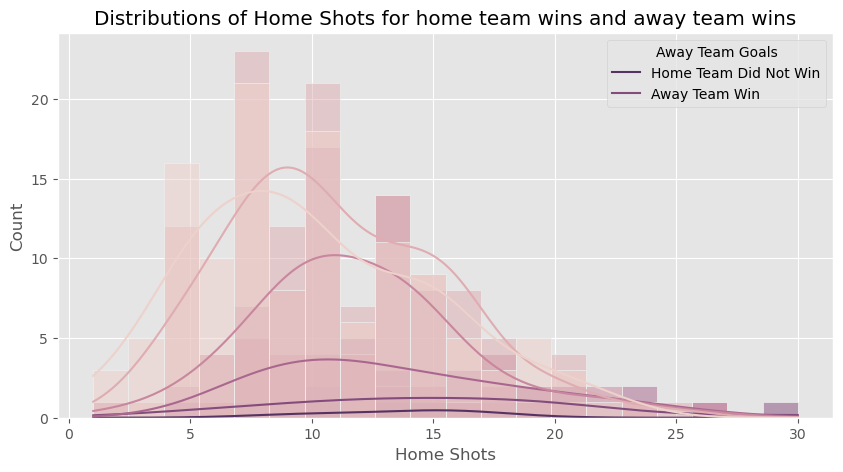

In [43]:
# Visualize the distributions of 'away_shots' for home team wins and away team wins
plt.figure(figsize = (10, 5))
sns.histplot(data = data_subset, x = 'away_shots', hue = 'Away Goals', bins = 20, kde = True)
plt.title('Distributions of Home Shots for home team wins and away team wins')
plt.xlabel('Home Shots')
plt.legend(title = 'Away Team Goals', labels = ['Home Team Did Not Win', 'Away Team Win'])
plt.show()

# Data Cleaning

- Categorical Encoding
- Outcome Conditions
- Create target column

In [ ]:
# Outcome Conditions
conditions = [
    (df['Goals Home'] > df['Away Goals']), # Win
    (df['Goals Home'] == df['Away Goals']), # Draw
    (df['Goals Home'] < df['Away Goals']) # Loss
    ]

# Defining outcome
values = [2, 1, 0] # (2 = Win, 1 = Draw, 0 = Loss)

# Create a target column
df['target'] = np.select(conditions, values)

df[['Home Team', 'Goals Home', 'Away Team', 'Away Goals', 'target']].head()

,Home Team,Goals Home,Away Team,Away Goals,target
0,Arsenal,5,Wolverhampton Wanderers,0,2
1,Aston Villa,2,Brighton and Hove Albion,1,2
2,Brentford,1,Manchester City,0,2
3,Chelsea,1,Newcastle United,1,1
4,Crystal Palace,1,Nottingham Forest,1,1
